In [1]:
library(fpp3)
library(imputeTS)
k = 1.5
options(repr.plot.width=6*k, repr.plot.height=5*k)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.8      ✔ tsibble     1.1.3 
✔ dplyr       1.0.10     ✔ tsibbledata 0.4.1 
✔ tidyr       1.2.1      ✔ feasts      0.3.0 
✔ lubridate   1.9.0      ✔ fable       0.3.2 
✔ ggplot2     3.4.0      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
lair <- as_tsibble(AirPassengers)

In [3]:
lair['value'] <- log(lair['value'])

In [4]:
lair

index,value
<mth>,<dbl>
1949 Jan,4.718499
1949 Feb,4.770685
1949 Mar,4.882802
1949 Apr,4.859812
1949 May,4.795791
1949 Jun,4.905275
1949 Jul,4.997212
1949 Aug,4.997212
1949 Sep,4.912655


Plot variable not specified, automatically selected `y = value`
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


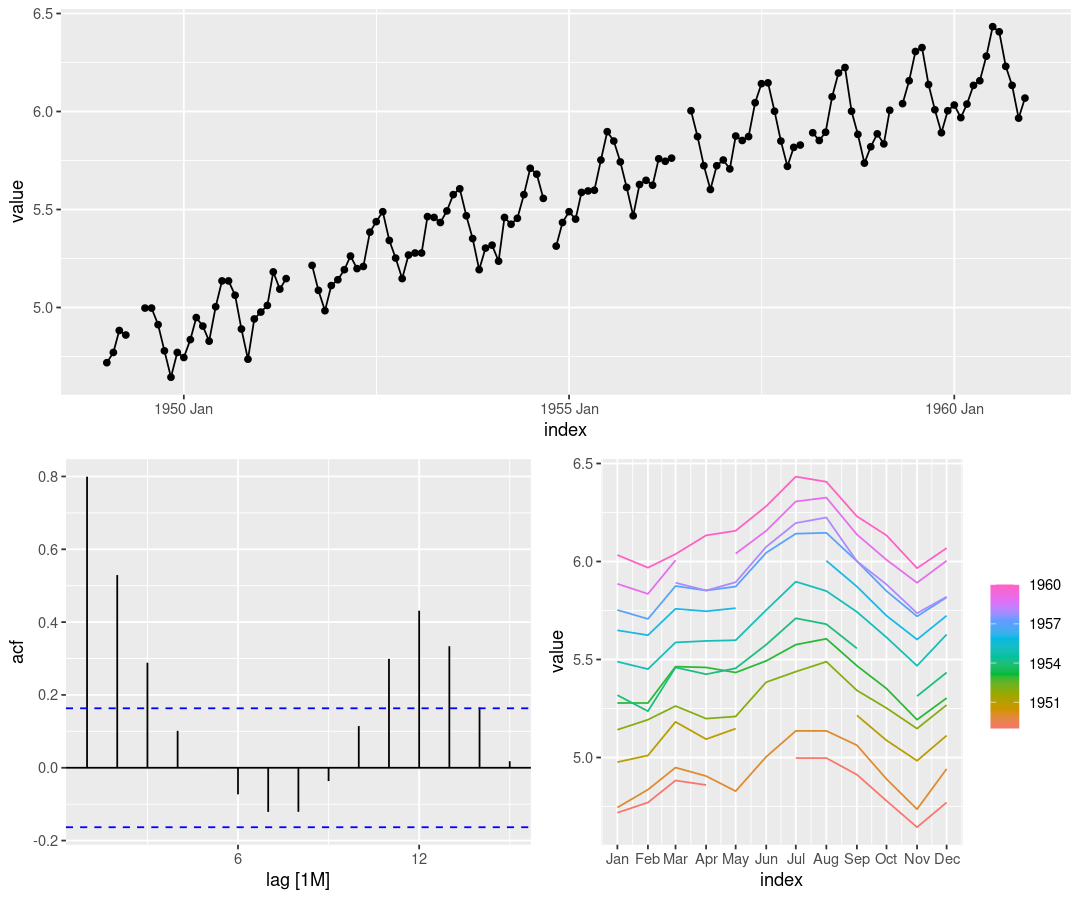

In [5]:
where_na <- c(5:6, 30:32, 70, 90:91, 110, 124)
lair_na <- lair
lair_na[['value']][where_na] = NA
gg_tsdisplay(lair_na)

In [6]:
k = 2
options(repr.plot.width=6*k, repr.plot.height=5*k)

In [7]:
lair_int = na_interpolation(lair_na)

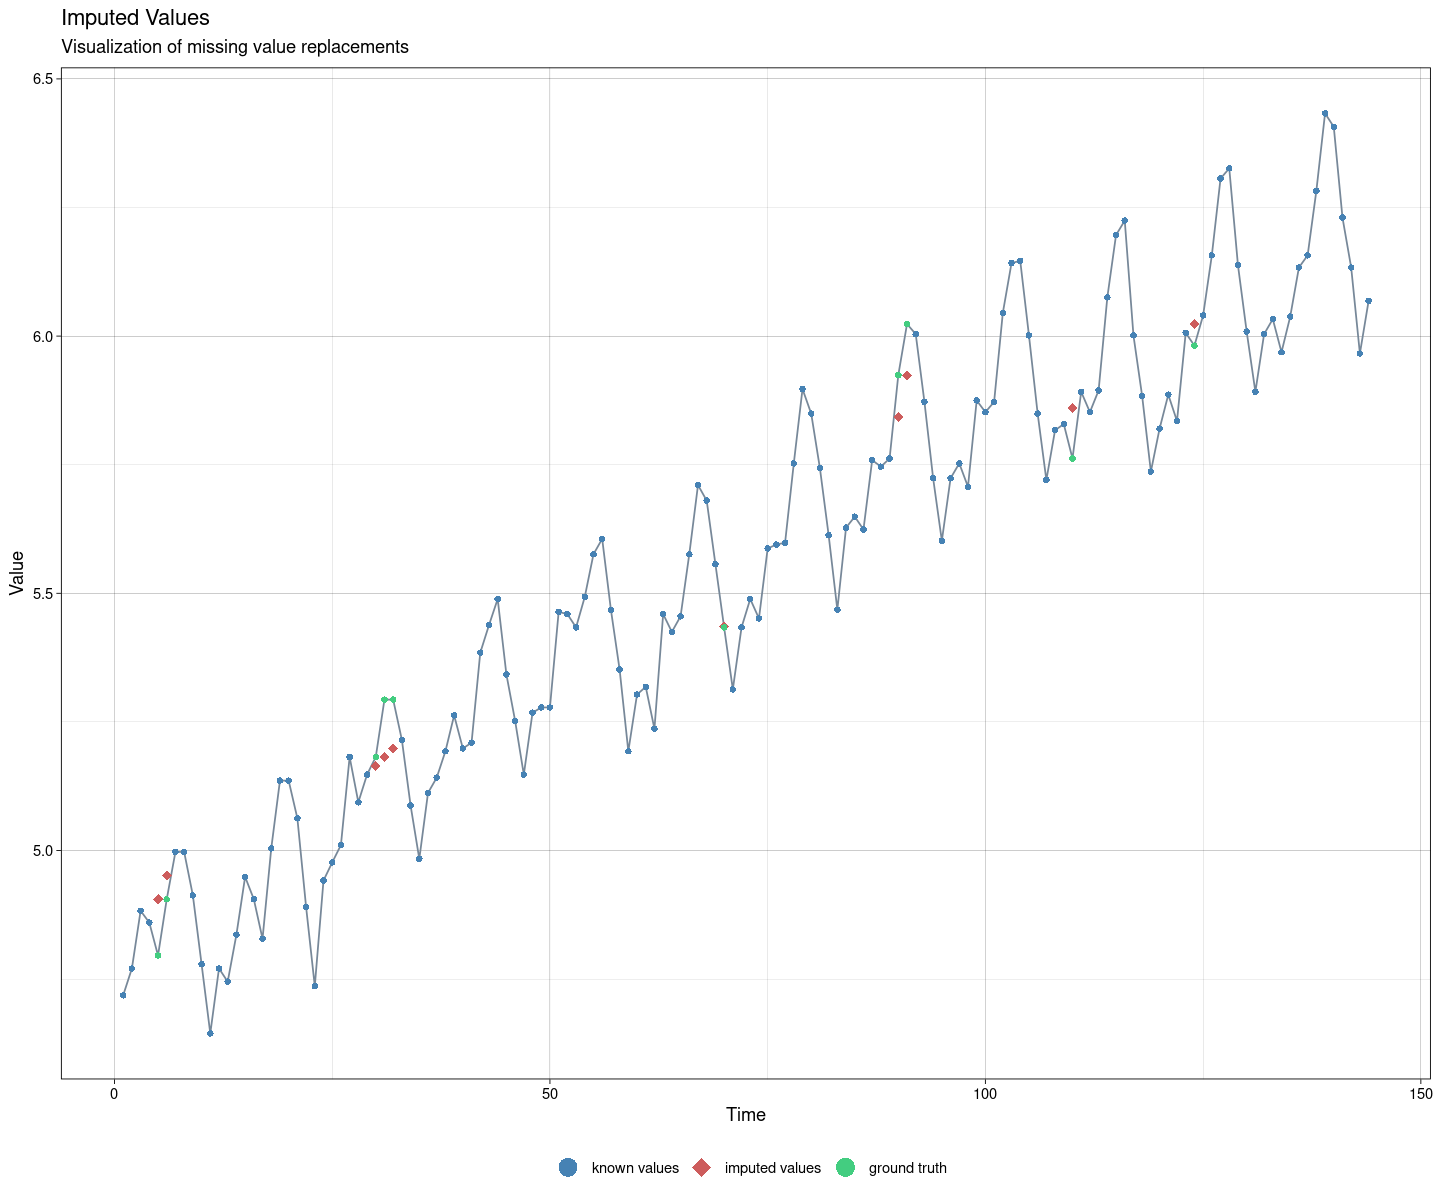

In [9]:
ggplot_na_imputations(lair_na, lair_int, lair)

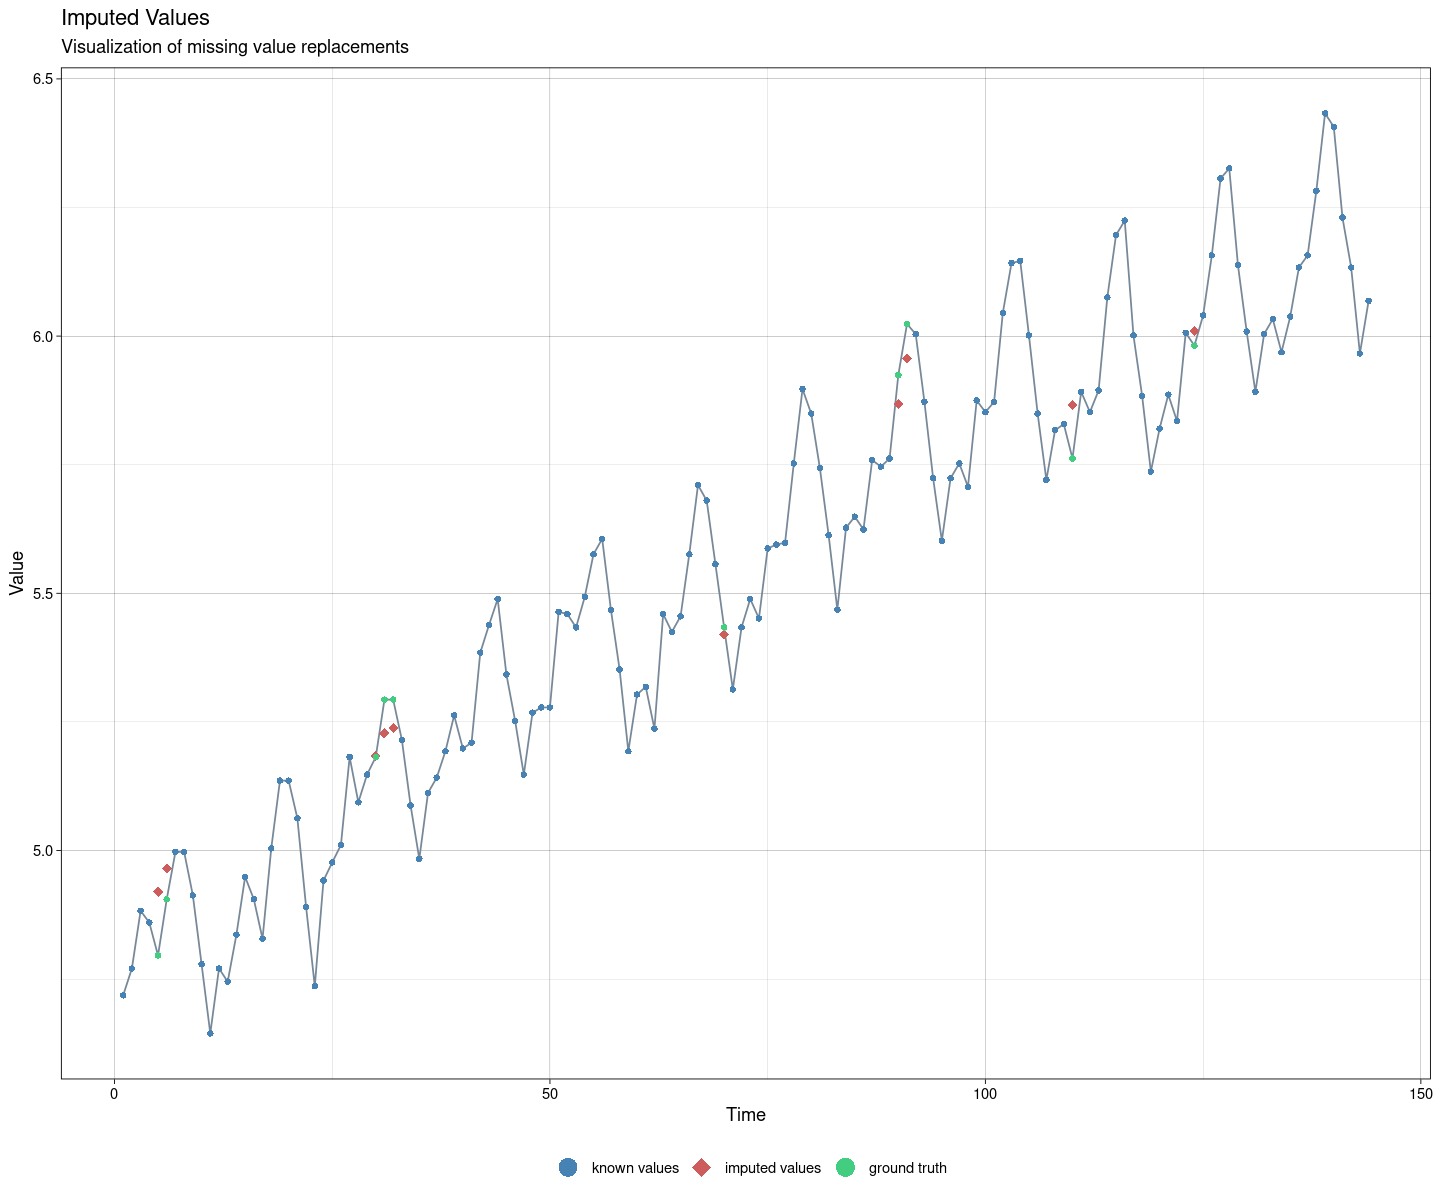

In [10]:
mod = arima(lair_na[['value']], 
  order = c(1, 1, 0),
  seasonal = list(order = c(0, 1, 0)))$model
lair_ar1 = na_kalman(lair_na, 
              model = mod)
ggplot_na_imputations(lair_na, 
                      lair_ar1, lair)

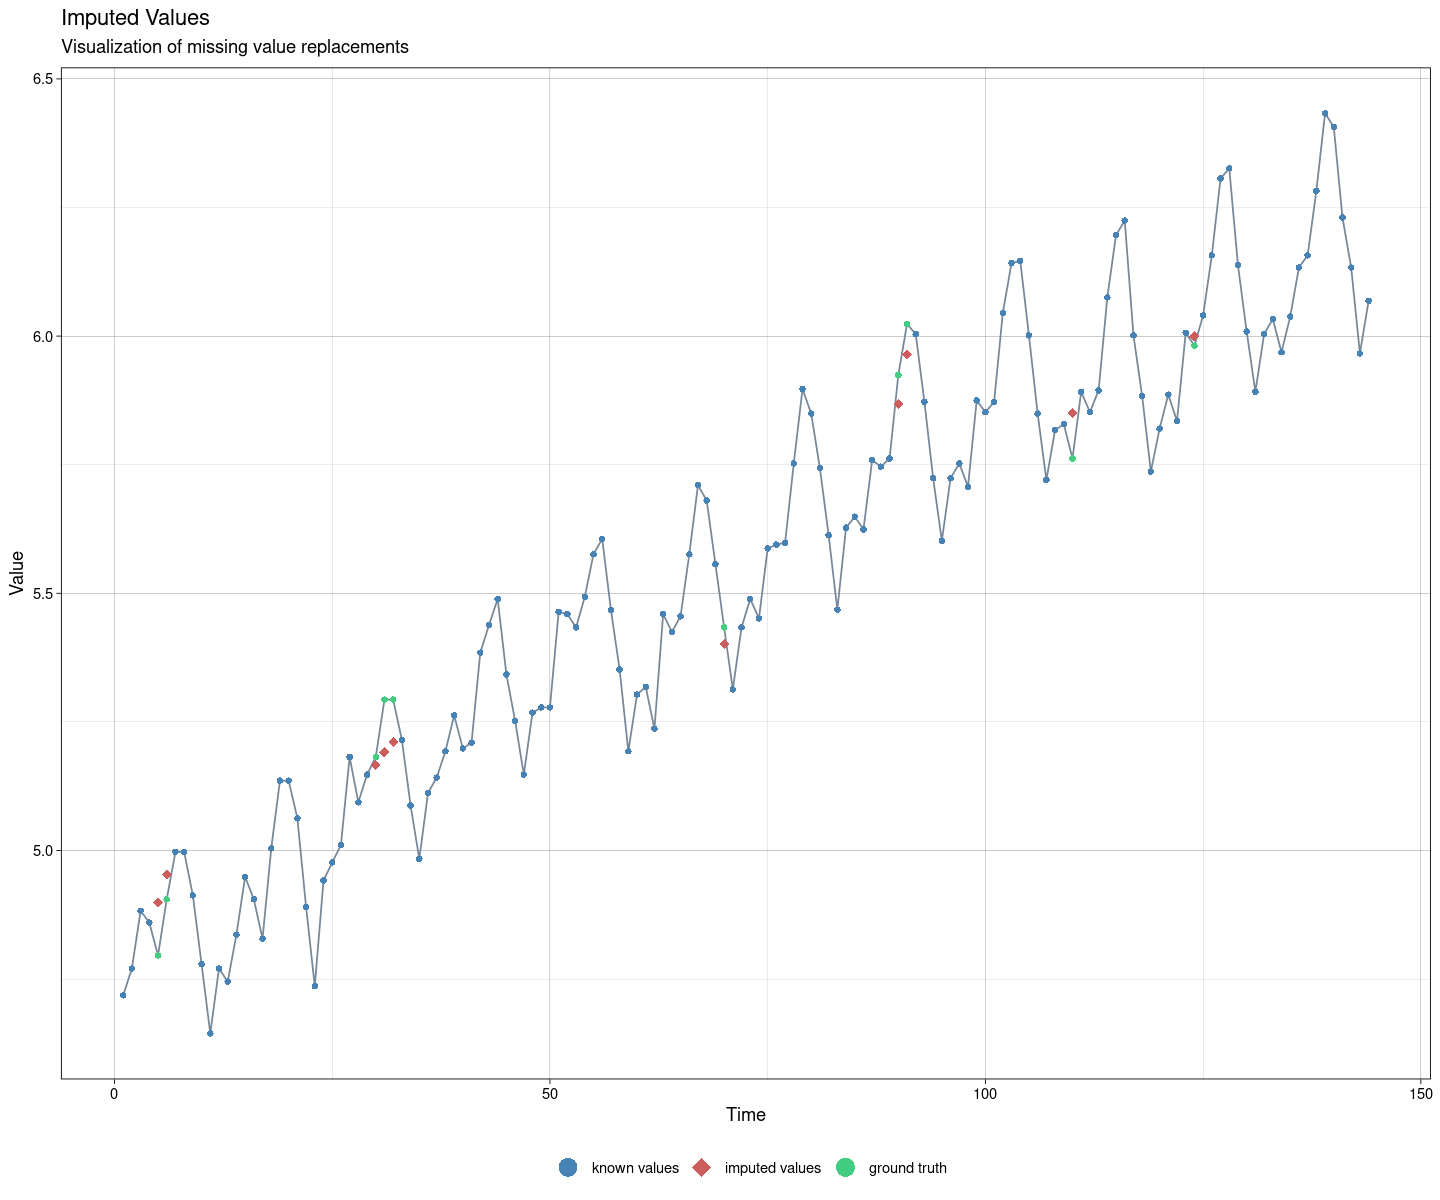

In [11]:
lair_ar2 = na_kalman(lair_na, 
              model = 'auto.arima')
ggplot_na_imputations(lair_na, 
                      lair_ar2, lair)

Warning message in na_seadec(data[, i], algorithm, find_frequency, maxgap, ...):
“No seasonality information for dataset could be found, going on without decomposition.
              Setting find_frequency=TRUE might be an option.”


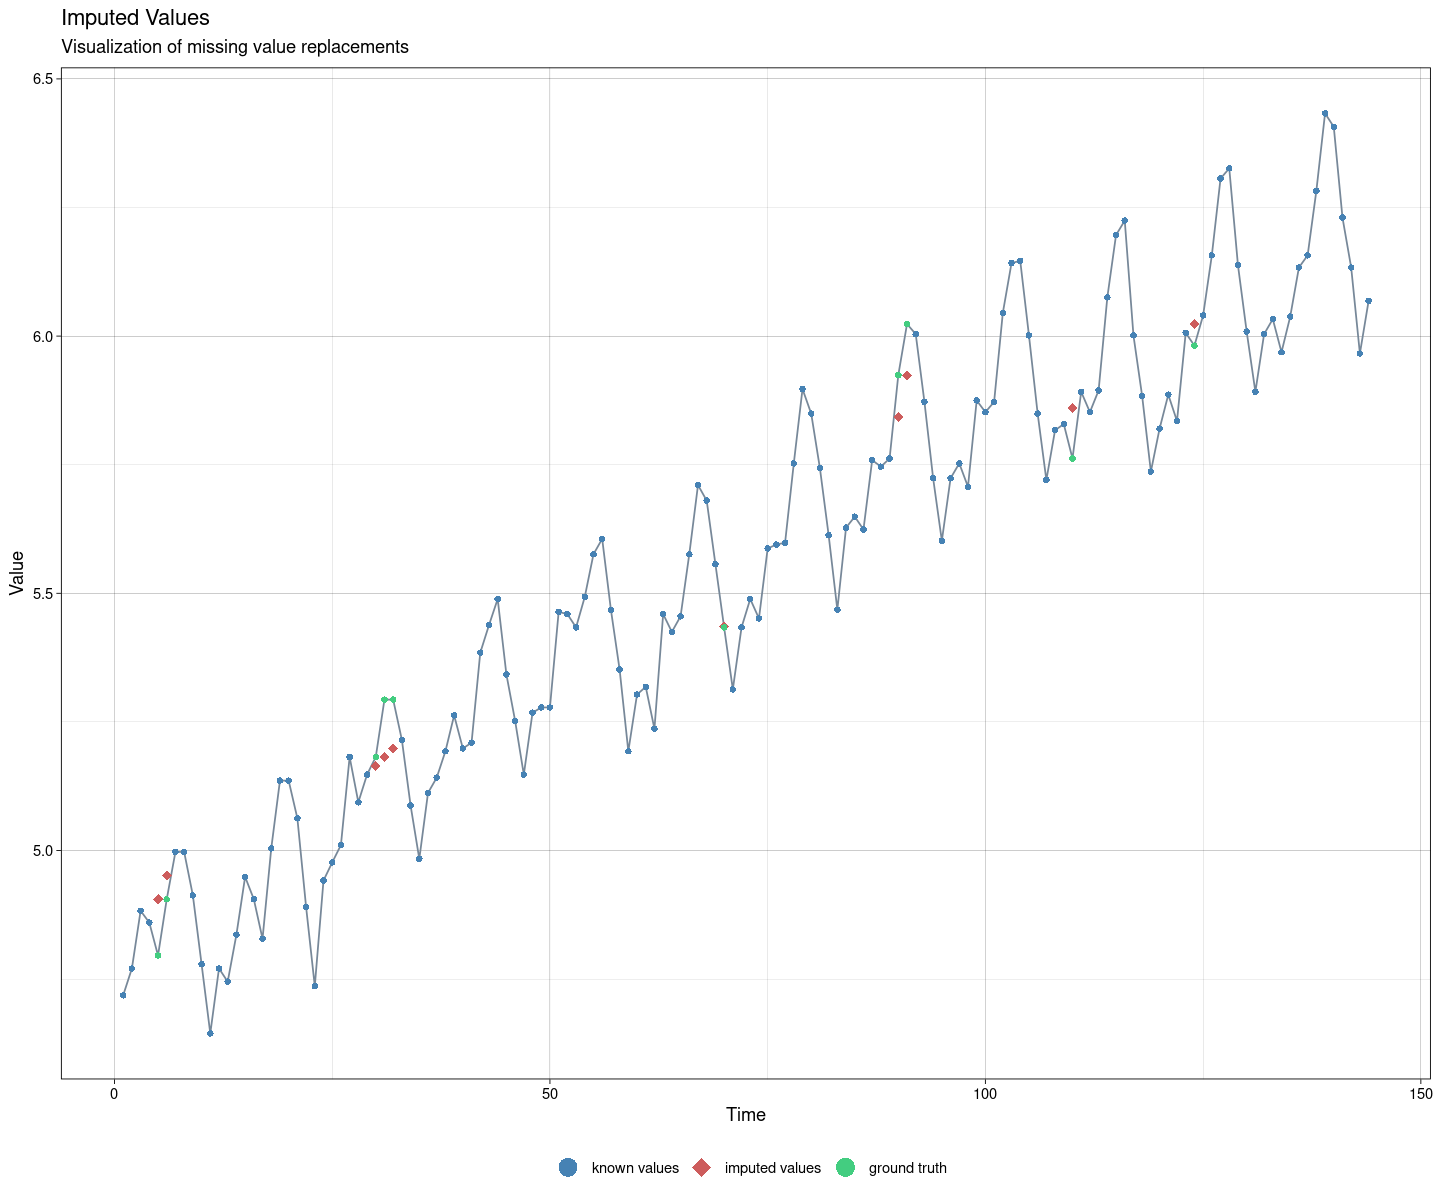

In [12]:
lair_s <- na_seadec(lair_na)
ggplot_na_imputations(lair_na, 
                      lair_s, lair)